In [1]:

import numpy as np

import sys
sys.path.append("../code/")
from dataloader import APPLIANCE_ORDER, get_train_test
from sklearn.metrics import mean_absolute_error
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline
import itertools
from pathlib import Path

/zf14/yj9xs/anaconda3/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
tensor = np.load("../2015-5appliances.numpy.npy")


In [3]:
hvac = tensor[:, 1].copy()
hvac = hvac[hvac>10]

In [4]:
sorted_hvac = np.sort(np.array(hvac))
print(len(sorted_hvac))
print(sorted_hvac[14996])

149962
231.316665649


In [5]:
fridge = tensor[:, 2].copy()
fridge = fridge[fridge>10]

In [6]:
sorted_fridge = np.sort(np.array(fridge))
print(len(sorted_fridge))
print(sorted_fridge[18031])

180313
45.7999992371


In [7]:
dr = tensor[:, 5].copy()
dr = dr[dr>10]

In [8]:
sorted_dr = np.sort(np.array(dr))
print(len(sorted_dr))
print(sorted_dr[2072])

20725
15.5


In [9]:
app = tensor[:, 1]

In [10]:
np.histogram(app[app<100].reshape(1, -1)[0], bins=20)

(array([32104,   714,   180,   157,   137,   134,   140,   902,   112,
          112,   287,   193,   263,   230,   144,   144,   144,   210,
          230,   270]),
 array([  0.        ,   4.99916649,   9.99833298,  14.99749947,
         19.99666595,  24.99583244,  29.99499893,  34.99416542,
         39.99333191,  44.9924984 ,  49.99166489,  54.99083138,
         59.98999786,  64.98916435,  69.98833084,  74.98749733,
         79.98666382,  84.98583031,  89.9849968 ,  94.98416328,  99.98332977]))

Text(0.5,1,'hvac >10')

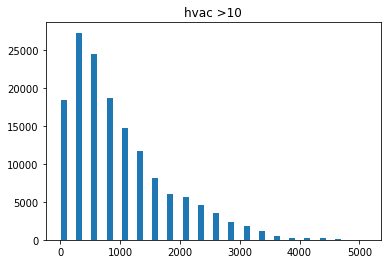

In [11]:
plt.hist(app[app>10].reshape(1, -1)[0], bins=20, width=100)
plt.title("hvac >10")

In [12]:
print(dr.max())
bins = np.arange(0, 4500, 200)
hist, bin_edges = np.histogram(dr.reshape(1, -1)[0], bins=bins)

980.566650391


In [13]:
dr_home = dr[i].reshape(-1, 1)[0]
dr_home = dr_home[dr_home>0]
dr_home

NameError: name 'i' is not defined

In [ ]:
dr.max(axis=1).max(axis=1).min()*0.05

In [ ]:
tensor[:, 2].

In [14]:
for i, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, i+1].copy()
    print(i, app.max(axis=1).max(axis=1).mean()* 0.05)

0 136.5926835
1 12.5596813202
2 149.887168705
3 33.5576224952
4 15.7314337787


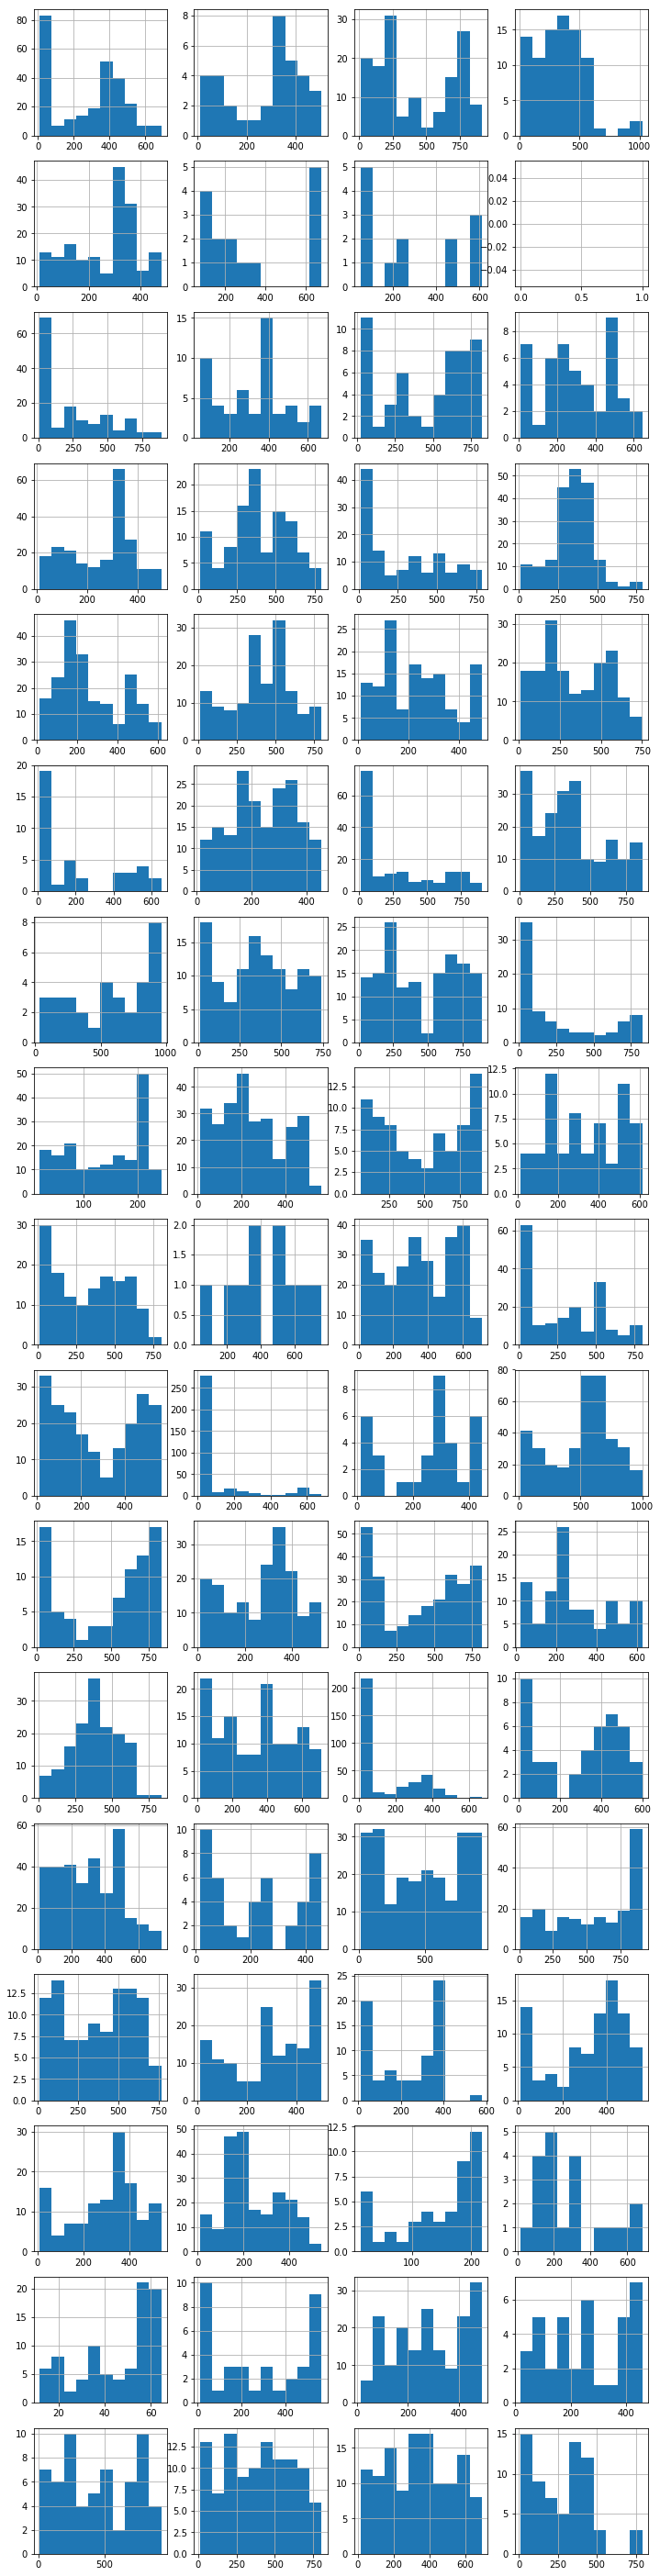

In [15]:
dr = tensor[:, 4]
fig, axes = plt.subplots(ncols=4, nrows = 17, figsize=(12, 51))
ax = axes.flatten()

for i in range(68):
    dr_home = dr[i].reshape(1, -1)[0]
    dr_home = dr_home[dr_home>10]
    pd.Series(dr_home).hist(ax=ax[i])


In [16]:
dr_on = dr[dr>10]
dr_100 = dr_on[dr_on<100]
dr_l_100 = dr_on[dr_on>500]

In [17]:
dr_l_100.mean()

656.10078955235895

(array([ 410.,  369.,  272.,  232.,  188.,  156.,  105.,  109.,   13.,    3.]),
 array([  500.1000061 ,   552.25667419,   604.41334229,   656.57001038,
          708.72667847,   760.88334656,   813.04001465,   865.19668274,
          917.35335083,   969.51001892,  1021.66668701]),
 <a list of 10 Patch objects>)

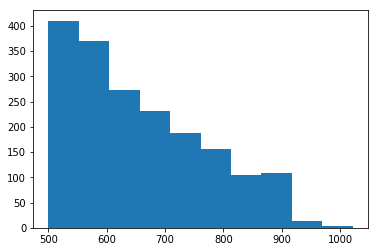

In [18]:
plt.hist(dr_l_100.reshape(1, -1)[0])

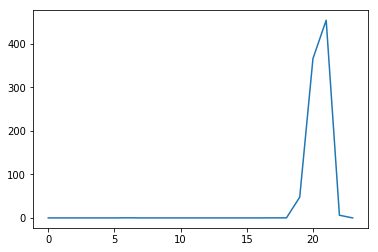

In [19]:
pd.Series(dr[0][110]).plot()

(array([  1.75940000e+05,   1.31700000e+03,   1.18500000e+03,
          1.47000000e+03,   1.10500000e+03,   7.48000000e+02,
          4.66000000e+02,   3.31000000e+02,   2.07000000e+02,
          1.50000000e+01]),
 array([    0.        ,   102.1666687 ,   204.3333374 ,   306.5000061 ,
          408.6666748 ,   510.83334351,   613.00001221,   715.16668091,
          817.33334961,   919.50001831,  1021.66668701]),
 <a list of 10 Patch objects>)

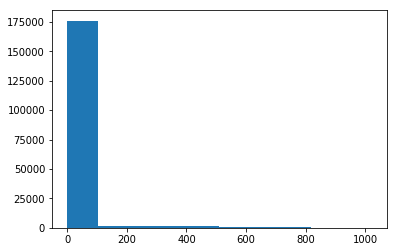

In [20]:
# for dryer
plt.hist(dr.reshape(1, -1)[0])

In [21]:
dw = tensor[:, 4]
dw[dw>0].mean()

117.04597207156934

In [22]:
hvac = tensor[:, 1]
fridge = tensor[: ,2]

In [23]:
hvac.max(axis=1).max(axis=1).mean()*0.1

273.18536700080421

In [24]:
fridge.max(axis=1).max(axis=1).mean()*0.1

25.11936264038086

In [25]:
dr.max(axis=1).max(axis=1).mean()*0.1

67.115244990411938

In [26]:
dw.max(axis=1).max(axis=1).mean()*0.1

67.115244990411938

In [27]:
mw.max(axis=1).max(axis=1).mean()*0.1

NameError: name 'mw' is not defined

In [28]:
on_threshold = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1, :, :]
    on_threshold[appliance] = app.max(axis=1).max(axis=1).mean()*0.14

In [29]:
on_threshold

{'hvac': 382.45951380112592,
 'fridge': 35.167107696533208,
 'dr': 419.68407237333417,
 'dw': 93.96134298657671,
 'mw': 44.048014580221739}

In [30]:
mw = tensor[:, -1]
pd.Series(mw[0][0])

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7     54.966667
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14    10.333333
15     0.000000
16     7.666667
17    22.316668
18    97.783333
19     0.200000
20     0.000000
21     0.100000
22     0.000000
23     0.000000
dtype: float64

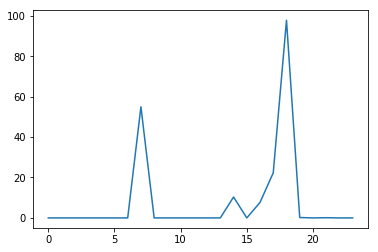

In [31]:
pd.Series(mw[0][0]).plot()

(array([  1.75940000e+05,   1.31700000e+03,   1.18500000e+03,
          1.47000000e+03,   1.10500000e+03,   7.48000000e+02,
          4.66000000e+02,   3.31000000e+02,   2.07000000e+02,
          1.50000000e+01]),
 array([    0.        ,   102.1666687 ,   204.3333374 ,   306.5000061 ,
          408.6666748 ,   510.83334351,   613.00001221,   715.16668091,
          817.33334961,   919.50001831,  1021.66668701]),
 <a list of 10 Patch objects>)

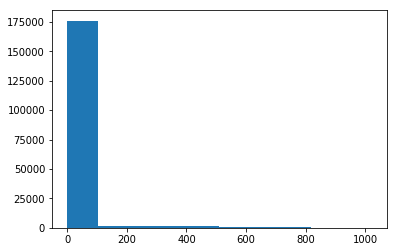

In [32]:
# for dw
dw = tensor[:, 4]
plt.hist(dw.reshape(1, -1)[0])

(array([  1.80444000e+05,   1.85600000e+03,   3.36000000e+02,
          7.60000000e+01,   2.80000000e+01,   3.30000000e+01,
          5.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          1.00000000e+00]),
 array([   0.        ,   98.05666504,  196.11333008,  294.16999512,
         392.22666016,  490.2833252 ,  588.33999023,  686.39665527,
         784.45332031,  882.50998535,  980.56665039]),
 <a list of 10 Patch objects>)

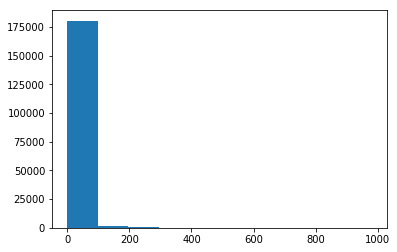

In [33]:
# for mw
mw = tensor[:, 5]
plt.hist(mw.reshape(1, -1)[0])

In [34]:
on_time = {'hvac':5, 'fridge':5, 'dr':5, 'dw':5, 'mw':2}

In [35]:
def myround(x, base=5):
    return int(base * round(float(x)/base))

In [36]:
threshold = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
#     print(idx, appliance)
    app = tensor[:, idx+1].copy()
    print(appliance, app.max(axis=1).max(axis=1).mean())
    threshold[appliance] = (myround(app.max(axis=1).max(axis=1).mean()*on_time[appliance]/60))

hvac 2731.85367001
fridge 251.193626404
dr 2997.7433741
dw 671.152449904
mw 314.628675573


In [37]:
threshold

{'hvac': 230, 'fridge': 20, 'dr': 250, 'dw': 55, 'mw': 10}

In [38]:
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1].copy()
    print(appliance, len(app[app>threshold[appliance]])/(68*112*24)*100)
#     print(appliance, app.max())

hvac 73.91018907563026
fridge 97.78153448879551
dr 4.962141106442576
dw 4.072019432773109
mw 11.338519782913165


In [39]:
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):

    app = tensor[:, idx+1].copy()
    print(appliance, app[app>threshold[appliance]].max(), 
          app[app>threshold[appliance]].mean(), app[app>threshold[appliance]].std())

hvac 5099.73339844 1162.65508886 800.246909739
fridge 428.633331299 88.5762313184 40.192876853
dr 4364.11669922 1303.61638917 756.153245163
dw 1021.66668701 369.540541349 206.452085561
mw 980.566650391 59.4959340625 53.08557644


In [40]:
appliance_order = {'hvac':'HVAC', 'fridge':'Fridge', 'dr':'Dryer', 'dw':'Dishwasher', 'mw':'Microwave'}

In [41]:
distribution = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    app = tensor[:, idx+1].copy()
    
    mask = (app>threshold[appliance])*1
    print(mask.sum())
    distribution[appliance_order[appliance]] = mask.sum(axis=0).sum(axis=0)/(68*112)

135096
178729
9070
7443
20725


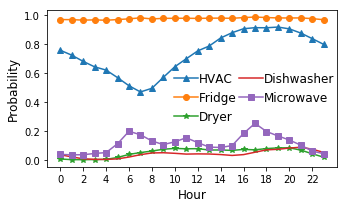

In [153]:
fig = plt.figure()
fig.set_size_inches(5, 3)
style=['^-', 'o-', '*-', '-', 's-']
ax = pd.DataFrame(distribution)['HVAC'].plot(kind='line', style=style[0])
pd.DataFrame(distribution)['Fridge'].plot(ax =ax , kind='line', style=style[1])
pd.DataFrame(distribution)['Dryer'].plot(ax =ax , kind='line', style=style[2])
pd.DataFrame(distribution)['Dishwasher'].plot(ax =ax , kind='line', style=style[3])
pd.DataFrame(distribution)['Microwave'].plot(ax =ax , kind='line', style=style[4])
# for idx, app in enumerate(['Fridge', 'Dryer', 'Dishwasher', 'Microwave']):
#     pd.DataFrame(distribution[app]).plot(ax=ax, kind='line', style=style[idx + 1])
fig = ax.get_figure()
fig.set_size_inches(5, 3)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Probability", fontsize=12)
# ax.set_title("On power probability")
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16 ,18, 20, 22])


ax.legend(fontsize=12, ncol=2, columnspacing=0.2, loc=(0.42, 0.25), handletextpad=0.1, framealpha=0, fancybox=True,)
plt.tight_layout()
plt.savefig("./figure/On_power_prob.pdf", format='pdf')

In [46]:
day_interval = {}
for idx, appliance in enumerate(['dr', 'dw']):
    app = tensor[:, idx+3]
    mask = (app>threshold[appliance])*1
    day_interval[appliance] = []
    for i in range(68):
        day_interval[appliance].append((np.ediff1d(np.nonzero(mask.sum(axis=2)[i]))-1).mean())
    day_interval[appliance] = np.nan_to_num(np.hstack(day_interval[appliance]))

/zf14/yj9xs/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice.
/zf14/yj9xs/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [47]:
dr = tensor[:, 3].copy()
# dr = dr.reshape(-1 ,112, 24)
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

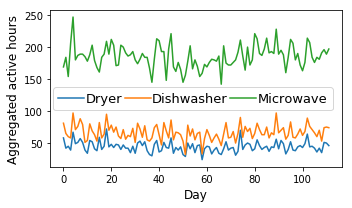

In [177]:
fig = plt.figure()
fig.set_size_inches(5, 3)
ax = pd.Series(((dr>threshold['dr'])*1).sum(axis=2).sum(axis=0)).plot()
pd.Series(((tensor[:, 4]>threshold['dw'])*1).sum(axis=2).sum(axis=0)).plot(ax=ax)
pd.Series(((tensor[:, 5]>threshold['mw'])*1).sum(axis=2).sum(axis=0)).plot(ax=ax)
ax.set_ylabel("Aggregated active hours", fontsize=12)
ax.set_xlabel("Day", fontsize=12)
ax.legend(['Dryer', 'Dishwasher', 'Microwave'], loc=(0.01, 0.36), fontsize=13, ncol=3, columnspacing=0.2,
          handletextpad=0.1)
plt.tight_layout()
plt.savefig("./figure/aggregate_active_hours.pdf", format='pdf')

In [60]:
tensor[:, i].mean(axis=0).mean(axis=0)

array([ 13.44843531,   7.80280111,   3.09095324,   1.04031426,
         1.13325235,   2.44050902,   7.06356574,  13.96417411,
        18.290312  ,  18.86920739,  17.36966692,  14.38483017,
        15.10871413,  14.90168287,  13.18847823,  12.35486698,
        12.30561536,  19.74942446,  25.9734484 ,  28.62723655,
        29.26736696,  32.22389266,  27.82027961,  20.12921701])

In [58]:
data = {}
for i in range(1, 6):
    data[i] = tensor[:, i].mean(axis=0).mean(axis=0)

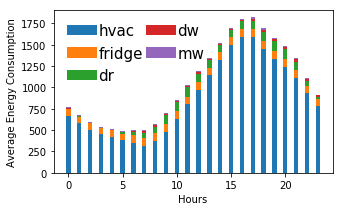

In [185]:
fig = plt.figure()
fig.set_size_inches(5, 3)
colors = ['orange', 'lightblue', 'pink', 'yellow', 'purple', 'pink']
# sp = calculate_selected_appliance(result['updated']['sp'], k)/(k*10*5)
color=['#ffbb78', '#c5b0d5', '#f7b6d2', '#c7c7c7', '#aec7e8', '#98df8a']
ind = np.arange(24)
width=0.4
p = {}
# bottom = data[1]
p[1] = plt.bar(ind, data[1], width)


for t in range(2, 6):
    bottom = 0
    for i in range(1, t):
        bottom += data[i]
    p[t] = plt.bar(ind, data[t], width, bottom=bottom)



plt.ylabel('Average Energy Consumption')
plt.xlabel('Hours')

plt.legend((p[1], p[2], p[3], p[4], p[5]), APPLIANCE_ORDER[1:], fontsize=15, ncol=2, 
           framealpha=0, fancybox=True, loc='upper left', handletextpad=0.1, columnspacing=0.2)

plt.savefig("./figure/stacked_energy_consumption.pdf", format='pdf')

In [33]:
((dr[5]>threshold['dr'])*1).sum(axis=1)

array([0, 8, 8, 0, 1, 0, 0, 0, 4, 8, 3, 3, 0, 0])

In [14]:
from pylab import hist, show, xticks, yticks

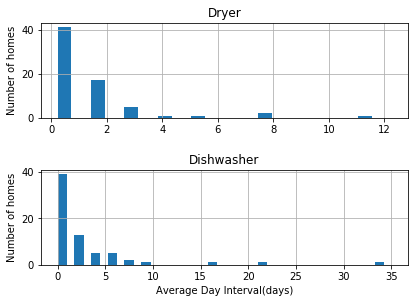

In [15]:
# plot with various axes scales
plt.figure(1)

# linear
plt.subplot(211)
plt.hist(day_interval['dr'], width=0.5,bins=10)
plt.title('Dryer')
plt.grid(True)
# plt.xlabel("Average Day Interval(days)")
plt.ylabel("Number of homes")

# log
plt.subplot(212)
plt.hist(day_interval['dw'],width=1, bins=20)
plt.title('Dishwasher')
plt.grid(True)

# plt.gca().yaxis.set_minor_formatter(NullFormatter())
# # Adjust the subplot layout, because the logit one may take more space
# # than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
plt.xlabel("Average Day Interval(days)")
plt.ylabel("Number of homes")


plt.show()
fig.tight_layout()
plt.savefig("./figure/Average_Day_Interval_dr_dw.pdf", format='pdf')

Text(0,0.5,'Number of homes')

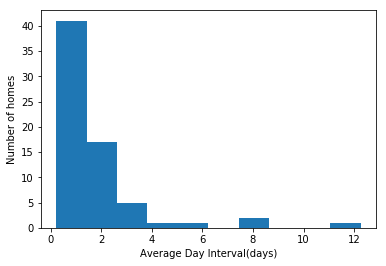

In [174]:
plt.hist(day_interval)
plt.xlabel("Average Day Interval(days)")
plt.ylabel("Number of homes")

In [67]:
tensor = np.load("../2015-5appliances-true-agg-residual.npy")

In [68]:
tensor.shape

(68, 7, 112, 24)

In [69]:
APPLIANCE_ORDER

['aggregate', 'hvac', 'fridge', 'dr', 'dw', 'mw', 'residual']

In [70]:
frac = tensor.mean(axis=2).mean(axis=2).mean(axis=0)
frac = frac/frac[0]


In [71]:
frac[5], frac[6] = frac[6], frac[5]
labels = APPLIANCE_ORDER.copy()
labels[5], labels[6] = labels[6], labels[5]

In [72]:
frac[1], frac[2] = frac[2], frac[1]
labels[1], labels[2] = labels[2], labels[1]

In [73]:
frac = [1, 0.4304834, 0.04292022, 0.03309639, 0.00763479, 0.00449848, 0.51863327]

In [74]:
labels = APPLIANCE_ORDER
labels

['aggregate', 'hvac', 'fridge', 'dr', 'dw', 'mw', 'residual']

In [75]:
new_labels=['aggregate', 'Fridge', 'HVAC', 'Dryer', 'Dishwasher', 'Residual', 'Microwave']

In [76]:
#1f77b4
color=['#ffbb78', '#c5b0d5', '#f7b6d2', '#c7c7c7', '#aec7e8', '#98df8a']

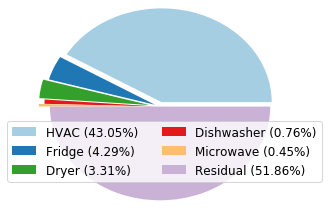

In [199]:

labels = ['HVAC (43.05%)', 'Fridge (4.29%)', 'Dryer (3.31%)', 'Dishwasher (0.76%)', 'Microwave (0.45%)', 'Residual (51.86%)']
from matplotlib import cm
cs=cm.Paired(np.arange(7)/7.)
fig = plt.figure()
fig.set_size_inches(5, 3)

sizes = [88.4, 10.6, 0.7, 0.3]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode=(0.05,0.05,0.1,0.05,0.1,0)
patches, texts = plt.pie(frac[1:], startangle=0, colors=cs, explode=explode)
plt.legend(patches, labels, loc=(-0.05, 0.1), ncol=2, fontsize=12)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis(ymax=1, ymin=-1, xmax=1.5)
plt.tight_layout()

# plt.show()
plt.savefig("./figure/proportional.pdf", format='pdf')

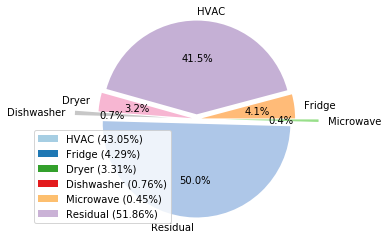

In [77]:
explode = (0.05,0.05,0.05, 0.3, 0.05,0.3)
plt.pie(frac[1:],explode=explode,labels=new_labels[1:] , colors=color,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 0, pctdistance = 0.6)

plt.axis('equal')
plt.legend(patches, labels, loc="best")
fig.tight_layout()


# plt.savefig("./figure/proportional.pdf", format='pdf')

In [454]:
dr = tensor[:, 3].copy()
dr_home = dr.reshape(68, -1)
mask = (dr_home>threshold['dr'])*1

days = []
for i in range(68):
    interval = (np.ediff1d(np.nonzero(mask[i]))-1)
    interval = interval[interval>6]
    days.append(interval)    

In [455]:
hist, bins = np.histogram(np.hstack(days), bins=np.arange(0, 800, 1))

In [456]:
hist.shape

(799,)

(1, 120)

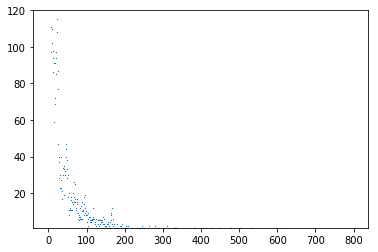

In [460]:
plt.scatter(bins[:-1], hist, s=0.1, marker='*')
plt.ylim(1, 120)

(array([1.219e+03, 4.040e+02, 3.880e+02, 2.910e+02, 3.670e+02, 3.870e+02,
        1.520e+02, 1.200e+02, 9.500e+01, 1.140e+02, 1.390e+02, 1.580e+02,
        8.700e+01, 6.200e+01, 6.000e+01, 6.400e+01, 7.600e+01, 6.500e+01,
        4.400e+01, 2.700e+01, 3.700e+01, 4.200e+01, 5.000e+01, 4.800e+01,
        3.000e+01, 1.800e+01, 2.800e+01, 2.100e+01, 3.100e+01, 1.600e+01,
        9.000e+00, 8.000e+00, 1.700e+01, 1.300e+01, 1.500e+01, 1.700e+01,
        7.000e+00, 9.000e+00, 6.000e+00, 1.500e+01, 3.200e+01, 8.000e+00,
        4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+0

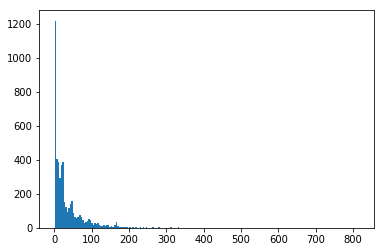

In [399]:
plt.hist(days, bins=200)

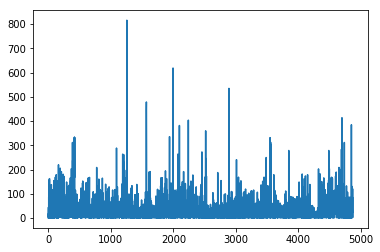

In [394]:
import matplotlib.pyplot as pp
pp.plot(days)
pp.show()

In [ ]:
day_interval = {}
for idx, appliance in enumerate(['dr', 'dw']):
    app = tensor[:, idx+3]
    mask = (app>threshold[appliance])*1
    day_interval[appliance] = []
    for i in range(68):
        day_interval[appliance].append((np.ediff1d(np.nonzero(mask.sum(axis=2)[i]))-1).mean())
    day_interval[appliance] = np.nan_to_num(np.hstack(day_interval[appliance]))